In [21]:
#import all libraries

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [22]:
# Read the file
df = pd.read_csv("swiggy-1.csv")
df

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63
...,...,...,...,...,...,...,...,...,...,...
8675,464626,Panjarapole Cross Road,Ahmedabad,Malt Pizza,500,2.9,80,Pizzas,Navrangpura,40
8676,465835,Rohini,Delhi,Jay Mata Ji Home Kitchen,200,2.9,80,South Indian,Rohini,28
8677,465872,Rohini,Delhi,Chinese Kitchen King,150,2.9,80,"Chinese,Snacks,Tandoor",Rohini,58
8678,465990,Rohini,Delhi,Shree Ram Paratha Wala,150,2.9,80,"North Indian,Indian,Snacks",Rohini,28


In [53]:
def sniff_modified(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        info['No. unique'] = df.apply(lambda x: len(x.unique()))
        info['unique values'] = df.apply(lambda x: x.unique())
        info.columns = info.columns.str.strip()
        return info.sort_values('data type')

.This above function is useful for quickly obtaining insights into the characteristics of each column in a DataFrame, which can be valuable during the exploratory data analysis (EDA) phase of a data science project.

In [24]:
sniff_modified(df)

,data type,percent missing,No. unique,unique values
ID,int64,0.0,8680,"[211, 221, 246, 248, 249, 254, 258, 263, 267, ..."
Price,int64,0.0,120,"[300, 650, 250, 350, 800, 1000, 150, 400, 532,..."
Total ratings,int64,0.0,8,"[100, 500, 50, 80, 1000, 5000, 20, 10000]"
Delivery time,int64,0.0,81,"[59, 56, 50, 57, 63, 53, 55, 54, 48, 52, 90, 4..."
Avg ratings,float64,0.0,30,"[4.4, 4.1, 3.9, 4.0, 4.5, 4.3, 4.2, 2.9, 3.8, ..."
Area,object,0.0,833,"[Koramangala, Jogupalya, Indiranagar, Domlur, ..."
City,object,0.0,9,"[Bangalore, Hyderabad, Mumbai, Pune, Kolkata, ..."
Restaurant,object,0.0,7865,"[Tandoor Hut, Tunday Kababi, Kim Lee, New Punj..."
Food type,object,0.0,3734,"[Biryani,Chinese,North Indian,South Indian, Mu..."
Address,object,0.0,2339,"[5Th Block, Double Road, 80 Feet Road, 100 Fee..."


In [25]:
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


# <font color= "PURPLE"> Frequency of Average Ratings </font>

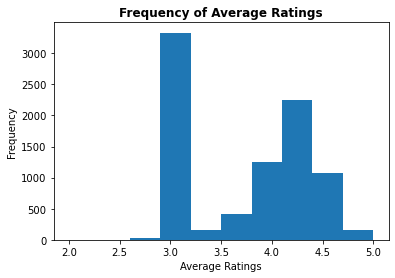

In [26]:
#create a histogram
plt.hist(df['Avg ratings'])
plt.xlabel('Average Ratings')
plt.ylabel('Frequency')
plt.title('Frequency of Average Ratings',fontdict={'fontweight':'bold'})
plt.show()

## <font color= "PURPLE"> Top 5 Restraurant by total ratings 

In [27]:
top5restro = df.groupby('Restaurant')['Total ratings'].sum().sort_values(ascending = False).head(5)
top5restro

Restaurant
Shah Ghouse Cafe & Restaurant    15000
Mehfil                           10160
Lucky Restaurant                 10020
Bawarchi                         10000
4M Biryani House                 10000
Name: Total ratings, dtype: int64

## <font color= "PURPLE"> Top 5 Restaurant with delivery time </font>


In [28]:
restrotime = df.groupby('Restaurant')['Delivery time'].sum().sort_values(ascending = True).head(5)
restrotime

Restaurant
Wah Ji Wah ( Budhvihar)    21
Sarvottam Restaurant       22
Hotel Niagara              23
Grand Hotel                24
Famous Ice Cream           24
Name: Delivery time, dtype: int64

## <font color= "PURPLE"> Top 5 Area with Avg. order of 2 Person </font>


In [29]:
restrotime = df.groupby('Area')['Price'].max().sort_values(ascending = False).head(5)
restrotime

Area
Vasanth Nagar        2500
Mylapore             2500
Scruz Bandra East    2500
Bandra Area          2000
Sangamvadi           2000
Name: Price, dtype: int64

In [30]:
categorical_cols = df.dtypes[df.dtypes == 'object'].index
numerical_cols = df.dtypes[df.dtypes != 'object'].index


In [31]:
categorical_cols, numerical_cols

(Index(['Area', 'City', 'Restaurant', 'Food type', 'Address'], dtype='object'),
 Index(['ID', 'Price', 'Avg ratings', 'Total ratings', 'Delivery time'], dtype='object'))

## <font color= "PURPLE"> Univariant </font>

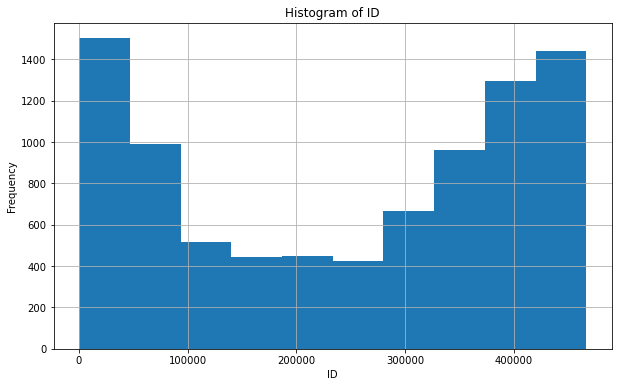

244812.07142857142
283442.0


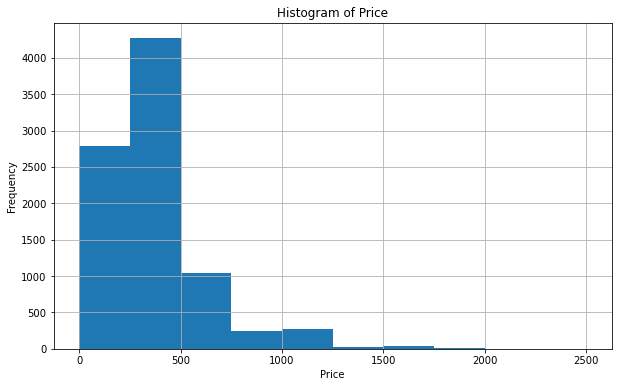

348.4444700460829
300.0


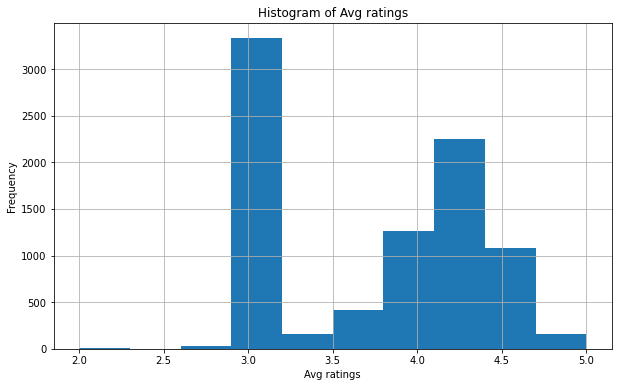

3.655103686635944
3.9


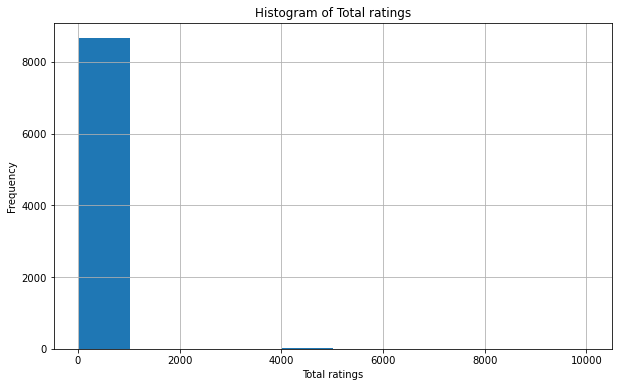

156.6347926267281
80.0


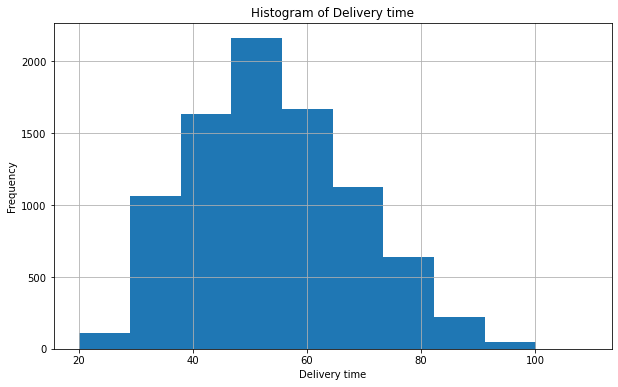

53.96705069124424
53.0


In [32]:
numerical_cols = df.dtypes[df.dtypes != 'object'].index

for col in numerical_cols:
    fig, ax = plt.subplots(figsize=(10, 6))
    df[col].hist(bins=10)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    print(df[col].mean())
    print(df[col].median())

 ## <font color= "PURPLE"> Bivariant </font>

In [33]:
correlation_matrix = df[numerical_cols].corr()
correlation_matrix

,ID,Price,Avg ratings,Total ratings,Delivery time
ID,1.000000,-0.144086,-0.457958,-0.189149,0.143817
Price,-0.144086,1.000000,0.113630,-0.014672,0.076009
Avg ratings,-0.457958,0.113630,1.000000,0.157900,-0.146987
Total ratings,-0.189149,-0.014672,0.157900,1.000000,-0.084090
Delivery time,0.143817,0.076009,-0.146987,-0.084090,1.000000


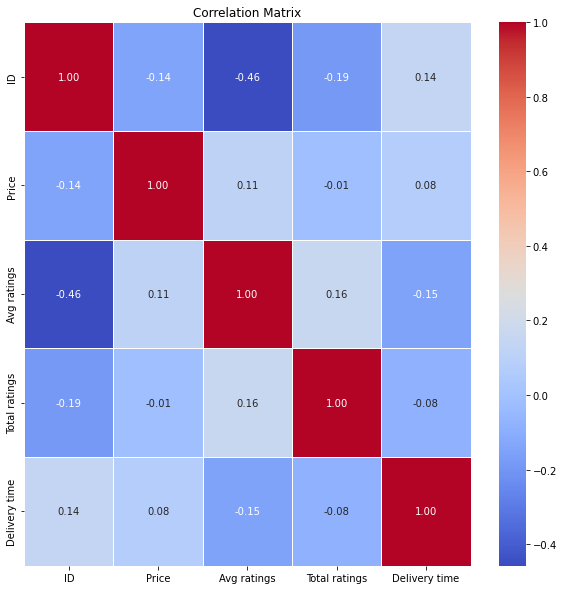

In [34]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

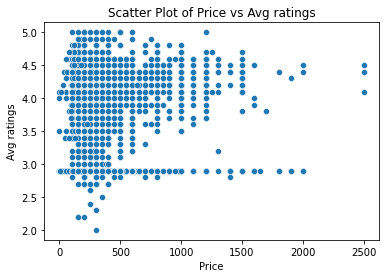

Correlation Coefficient: 0.11363038630435679


In [35]:
sns.scatterplot(x='Price', y='Avg ratings', data=df)
plt.title('Scatter Plot of Price vs Avg ratings')
plt.xlabel('Price')
plt.ylabel('Avg ratings')
plt.show()

# Correlation coefficient
correlation_coefficient = df['Price'].corr(df['Avg ratings'])
print(f'Correlation Coefficient: {correlation_coefficient}')

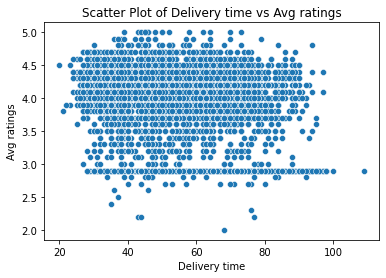

Correlation Coefficient: -0.14698693568882568


In [44]:
sns.scatterplot(x='Delivery time', y='Avg ratings', data=df)
plt.title('Scatter Plot of Delivery time vs Avg ratings')
plt.xlabel('Delivery time')
plt.ylabel('Avg ratings')
plt.show()

# Correlation coefficient
correlation_coefficient = df['Delivery time'].corr(df['Avg ratings'])
print(f'Correlation Coefficient: {correlation_coefficient}')

# <font color = "Blue"> Advanced Machine Learning Analysis </font>

## Feature Engineering

In [45]:
label_encoder = LabelEncoder()
df[categorical_cols]=df[categorical_cols].apply(LabelEncoder().fit_transform)

In [46]:
min_max_scaler = MinMaxScaler()
df[numerical_cols] = min_max_scaler.fit_transform(df[numerical_cols])

In [47]:
id_col= ['Restaurant']
target_col = ['Delivery time']

In [48]:
X = df.drop(target_col, axis=1)
y=df[target_col]

In [49]:
X.shape, y.shape

((8680, 9), (8680, 1))

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20)

## <font color= "PURPLE"> Decision Tree Regressor </font>

In [51]:
model = DecisionTreeRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.016469011092836692


## <font color= "PURPLE"> Random Forest Regressor </font>

In [52]:
random = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
random.fit(X_train, y_train) # ravel() is used to flatten y_train

# Make predictions on the test set
predictions = random.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.008476661322029696
